In [13]:
import warnings  # Import warnings module to handle warnings
warnings.filterwarnings('ignore')  # Suppress warnings to avoid cluttering the output

In [14]:
import os  # Import os module for file path operations
from PIL import Image  # Import PIL for image processing
import pandas as pd  # Import pandas (though not used, can be useful for data handling)

# Define the path where the dataset is stored
dataset_path = '/content/drive/MyDrive/Colab Notebooks/Waste-classifier/resized_dataset'

# Retrieve the names of all folders (representing garbage types) within the dataset directory
garbage_types = os.listdir(dataset_path)

# Create a set to store unique image dimensions across the dataset
all_dimensions_set = set()

# Iterate over each garbage type (folder) to process images
for garbage_type in garbage_types:
    folder_path = os.path.join(dataset_path, garbage_type)  # Construct folder path

    # Verify that the current item is a directory
    if os.path.isdir(folder_path):
        # Get a list of all image files in the folder (filtering for JPG and JPEG formats)
        image_files = [f for f in os.listdir(folder_path) if f.endswith(('jpg', 'jpeg'))]

        # Display the count of images in the current folder
        num_images = len(image_files)
        print(f"{garbage_type} folder contains {num_images} images.")

        # Loop over each image to check its dimensions
        for image_file in image_files:
            image_path = os.path.join(folder_path, image_file)  # Get full image path

            with Image.open(image_path) as img:  # Open the image
                # Extract width, height, and color channels (bands)
                width, height = img.size
                channels = len(img.getbands())  # Number of color channels (e.g., RGB = 3)

                # Add the image dimensions to the set (ensures uniqueness)
                all_dimensions_set.add((width, height, channels))

# Check if all images have the same dimensions
if len(all_dimensions_set) == 1:
    width, height, channels = all_dimensions_set.pop()  # Extract the single unique dimension
    print(f"\nAll images in the dataset have the same dimensions: {width}x{height} with {channels} color channels.")
else:
    print("\nThe images in the dataset have different dimensions or color channels.")

textile folder contains 404 images.
organic folder contains 368 images.
glass folder contains 401 images.
plastic folder contains 408 images.
paper folder contains 406 images.

All images in the dataset have the same dimensions: 224x224 with 3 color channels.


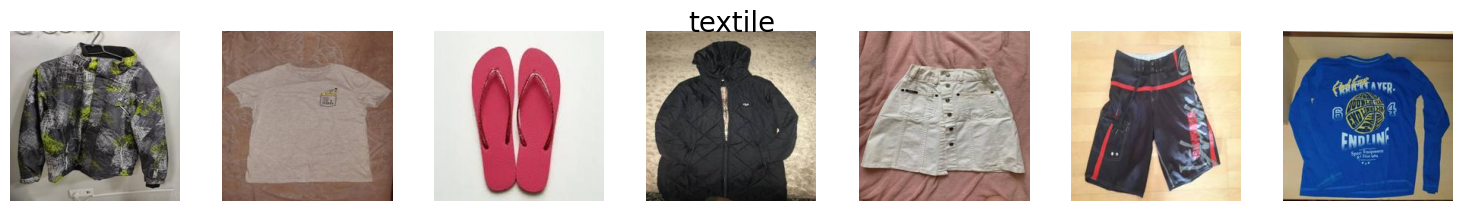

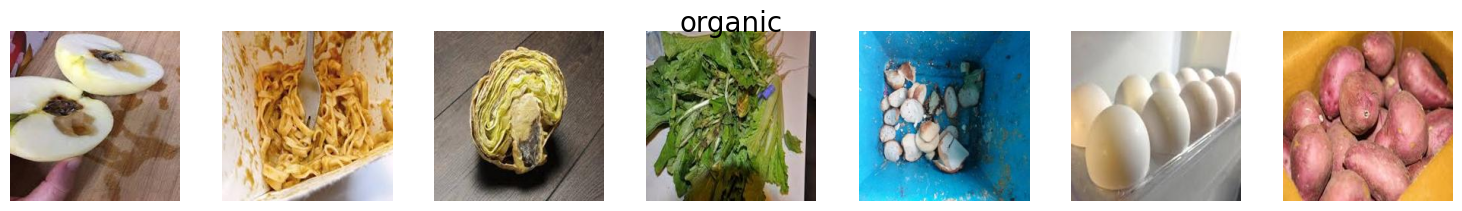

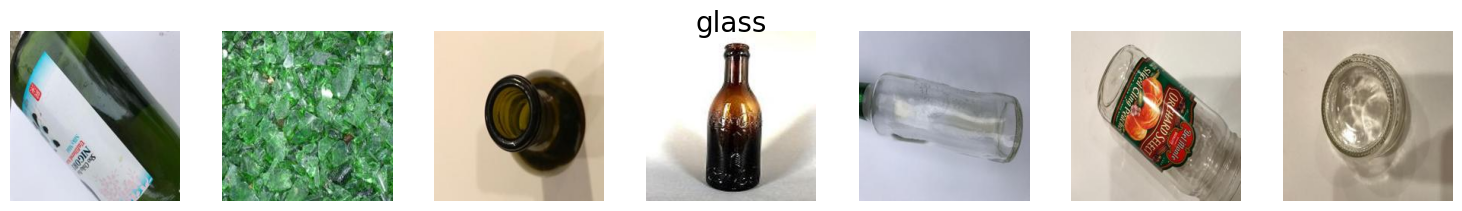

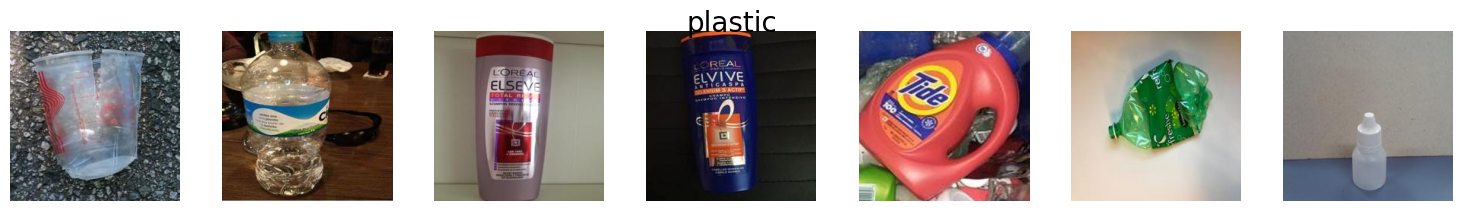

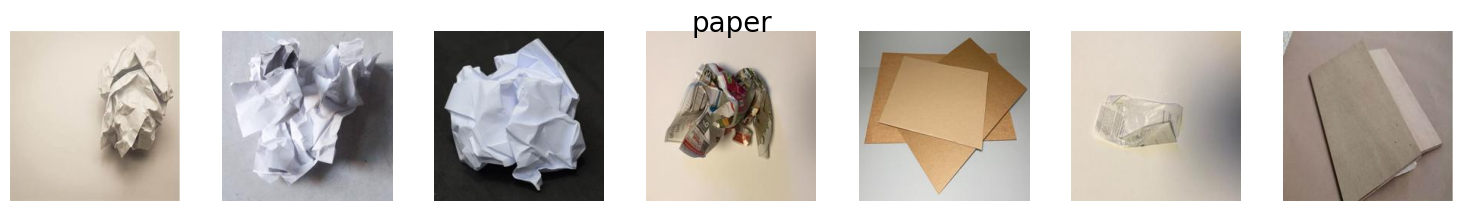

In [15]:
import os  # Import os to work with file paths
import matplotlib.pyplot as plt  # Import Matplotlib for visualization
from matplotlib.colors import LinearSegmentedColormap  # Import color mapping for potential customizations
from PIL import Image  # Import PIL to handle image loading and display

# Iterate over each garbage type (folder) to display sample images
for garbage_type in garbage_types:
    folder_path = os.path.join(dataset_path, garbage_type)  # Construct the folder path

    # Verify that the current item is a valid directory
    if os.path.isdir(folder_path):
        # List all image files with .jpg or .jpeg extensions in the folder
        image_files = [f for f in os.listdir(folder_path) if f.endswith(('jpg', 'jpeg'))]

        # Select the first 7 images (change this number if needed)
        image_files = image_files[:7]

        # Set up subplots with 1 row and 7 columns, ensuring proper layout
        fig, axs = plt.subplots(1, len(image_files), figsize=(15, 2))

        # Loop through selected images and display them
        for i, image_file in enumerate(image_files):
            image_path = os.path.join(folder_path, image_file)  # Get full path to the image

            with Image.open(image_path) as img:  # Open the image
                axs[i].imshow(img)  # Display the image
                axs[i].axis('off')  # Hide axis for better visualization

        # Adjust layout to prevent overlap
        plt.tight_layout()

        # Add a title above the image row, indicating the garbage type
        fig.suptitle(garbage_type, fontsize=20, y=1.03)

        # Display the figure
        plt.show()

In [16]:
import os  # Import the os module to work with file paths
import pandas as pd  # Import pandas for handling structured data

# Initialize an empty list to store image file paths and their respective labels
data = []

# Loop through each garbage type and collect its images' file paths
for garbage_type in garbage_types:
    garbage_path = os.path.join(dataset_path, garbage_type)  # Construct the full path to the garbage type folder

    for file in os.listdir(garbage_path):  # Iterate through all files in the folder
        file_path = os.path.join(garbage_path, file)  # Get the full file path

        # Append the image file path and its corresponding class label (garbage type) to the data list
        data.append((file_path, garbage_type))

# Convert the collected data into a Pandas DataFrame for easy manipulation
df = pd.DataFrame(data, columns=['filepath', 'label'])

# Display the first few entries of the DataFrame to verify data collection
df.head()

,filepath,label
0,/content/drive/MyDrive/Colab Notebooks/Waste-c...,textile
1,/content/drive/MyDrive/Colab Notebooks/Waste-c...,textile
2,/content/drive/MyDrive/Colab Notebooks/Waste-c...,textile
3,/content/drive/MyDrive/Colab Notebooks/Waste-c...,textile
4,/content/drive/MyDrive/Colab Notebooks/Waste-c...,textile


In [17]:
import matplotlib.pyplot as plt  # Import the necessary library for plotting

def plot_learning_curves(history, start_epoch=1):
    """
    Plots the learning curves of training and validation accuracy/loss
    over epochs from a given Keras history object.

    Parameters:
    - history: Keras History object containing training metrics.
    - start_epoch: The starting epoch for plotting (default is 1).
    """

    # Define the range of epochs to plot
    epochs = range(start_epoch, len(history.history['loss']) + 1)

    # Create a figure with two subplots
    plt.figure(figsize=(12, 5))

    # Plot training & validation accuracy
    plt.subplot(1, 2, 1)  # First subplot
    plt.plot(epochs, history.history['accuracy'], label="Train Accuracy")  # Plot training accuracy
    plt.plot(epochs, history.history['val_accuracy'], label="Val Accuracy")  # Plot validation accuracy
    plt.xlabel("Epochs")  # Label for x-axis
    plt.ylabel("Accuracy")  # Label for y-axis
    plt.title("Training & Validation Accuracy")  # Title for the subplot
    plt.legend()  # Show legend

    # Plot training & validation loss
    plt.subplot(1, 2, 2)  # Second subplot
    plt.plot(epochs, history.history['loss'], label="Train Loss")  # Plot training loss
    plt.plot(epochs, history.history['val_loss'], label="Val Loss")  # Plot validation loss
    plt.xlabel("Epochs")  # Label for x-axis
    plt.ylabel("Loss")  # Label for y-axis
    plt.title("Training & Validation Loss")  # Title for the subplot
    plt.legend()  # Show legend

    # Display the plots
    plt.show()

In [18]:
from sklearn.metrics import classification_report, confusion_matrix  # Import evaluation metrics
import numpy as np  # Import NumPy for numerical operations

def evaluate_model_performance(model, val_generator, class_labels):
    """
    Evaluates the performance of a trained model using a validation data generator.

    Parameters:
    - model: Trained Keras model to be evaluated.
    - val_generator: Keras ImageDataGenerator or data generator for validation.
    - class_labels: List of class labels corresponding to output classes.

    Returns:
    - y_true: Actual class labels.
    - y_pred_classes: Predicted class labels.
    """

    # Evaluate the model on the validation dataset
    loss, accuracy = model.evaluate(val_generator)
    print(f"Validation Accuracy: {accuracy * 100:.2f}%")  # Print accuracy in percentage
    print(f"Validation Loss: {loss:.4f}")  # Print loss with 4 decimal places

    # Get the true labels from the validation generator
    y_true = val_generator.classes

    # Get predicted probabilities from the model
    y_pred = model.predict(val_generator)

    # Convert predicted probabilities into class labels (argmax selects the highest probability class)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Print the classification report for detailed evaluation (precision, recall, F1-score)
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred_classes, target_names=class_labels))

    return y_true, y_pred_classes  # Return true and predicted class labels

In [19]:
import seaborn as sns  # Import Seaborn for visualization
import matplotlib.pyplot as plt  # Import Matplotlib for plotting
from sklearn.metrics import confusion_matrix  # Import confusion matrix function

def plot_confusion_matrix(y_true, y_pred_classes, class_labels):
    """
    Plots the confusion matrix for model predictions.

    Parameters:
    - y_true: Array of actual class labels.
    - y_pred_classes: Array of predicted class labels.
    - class_labels: List of class names corresponding to class indices.

    Returns:
    - Displays a heatmap of the confusion matrix.
    """

    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)

    # Set the figure size for better visualization
    plt.figure(figsize=(8, 6))

    # Create a heatmap using Seaborn
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_labels, yticklabels=class_labels)

    # Set axis labels and title
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")

    # Display the plot
    plt.show()

In [20]:
from sklearn.model_selection import train_test_split  # Import train-test split function

# Split the dataset into training and validation sets using stratification
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

"""
Parameters:
- df: DataFrame containing image file paths and labels.
- test_size=0.2: 20% of the dataset is used for validation.
- random_state=42: Ensures reproducibility of the split.
- stratify=df['label']: Ensures class distribution is maintained in both sets.
"""

# Print the number of images in each set
print(f"Number of images in the training set: {len(train_df)}")
print(f"Number of images in the validation set: {len(val_df)}")

Number of images in the training set: 1589
Number of images in the validation set: 398


In [21]:
# 1. Compute the class distribution for the entire dataset
overall_distribution = df['label'].value_counts(normalize=True) * 100  # Normalize to get percentage

# 2. Compute the class distribution for the training set
train_distribution = train_df['label'].value_counts(normalize=True) * 100

# 3. Compute the class distribution for the validation set
val_distribution = val_df['label'].value_counts(normalize=True) * 100

# Display the class distributions with rounding for better readability
print("Class distribution in the entire dataset:\n")
print(overall_distribution.round(2))  # Round to two decimal places
print('-' * 40)

print("\nClass distribution in the training set:\n")
print(train_distribution.round(2))
print('-' * 40)

print("\nClass distribution in the validation set:\n")
print(val_distribution.round(2))

# Extract unique class labels from the 'label' column of the training dataset
class_labels = train_df['label'].unique()

# Display the extracted class labels
print("Class Labels:", class_labels)

Class distribution in the entire dataset:

label
plastic    20.53
paper      20.43
textile    20.33
glass      20.18
organic    18.52
Name: proportion, dtype: float64
----------------------------------------

Class distribution in the training set:

label
plastic    20.52
paper      20.45
textile    20.33
glass      20.20
organic    18.50
Name: proportion, dtype: float64
----------------------------------------

Class distribution in the validation set:

label
plastic    20.60
textile    20.35
paper      20.35
glass      20.10
organic    18.59
Name: proportion, dtype: float64
Class Labels: ['paper' 'plastic' 'textile' 'glass' 'organic']


In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def create_data_generators(train_df, val_df, img_size=(224, 224), batch_size=32, preprocessing_function=None):
    """
    Creates data generators for training and validation datasets.

    Parameters:
        train_df (DataFrame): DataFrame containing training data with 'filepath' and 'label' columns.
        val_df (DataFrame): DataFrame containing validation data with 'filepath' and 'label' columns.
        img_size (tuple): Target size for resizing images (default: (224, 224)).
        batch_size (int): Number of images per batch (default: 32).
        preprocessing_function (function): Preprocessing function for image normalization (default: None).

    Returns:
        train_generator, val_generator: Data generators for training and validation.
    """

    # If no preprocessing function (like ResNet50's `preprocess_input`) is provided, apply rescaling
    if preprocessing_function is None:
        train_datagen = ImageDataGenerator(
            rescale=1./255,  # Normalize pixel values to [0,1] range
            rotation_range=60,  # Randomly rotate images up to 60 degrees
            width_shift_range=0.15,  # Shift image width up to 15%
            height_shift_range=0.15,  # Shift image height up to 15%
            zoom_range=0.20,  # Random zoom up to 20%
            horizontal_flip=True,  # Random horizontal flip
            vertical_flip=True,  # Random vertical flip
            shear_range=0.05,  # Apply shear transformation
            brightness_range=[0.9, 1.1],  # Adjust brightness randomly
            channel_shift_range=10,  # Randomly shift RGB channels
            fill_mode='nearest'  # Fill missing pixels using nearest neighbor interpolation
        )
        val_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale validation images
    else:
        train_datagen = ImageDataGenerator(
            preprocessing_function=preprocessing_function,  # Use custom preprocessing (e.g., ResNet50 preprocessing)
            rotation_range=60,
            width_shift_range=0.15,
            height_shift_range=0.15,
            zoom_range=0.20,
            horizontal_flip=True,
            vertical_flip=True,
            shear_range=0.05,
            brightness_range=[0.9, 1.1],
            channel_shift_range=10,
            fill_mode='nearest'
        )
        val_datagen = ImageDataGenerator(preprocessing_function=preprocessing_function)

    # Create training data generator
    train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_df,  # DataFrame containing image paths and labels
        x_col="filepath",  # Column name containing image file paths
        y_col="label",  # Column name containing image labels
        target_size=img_size,  # Resize images to (224, 224)
        batch_size=batch_size,  # Number of images per batch
        class_mode='categorical',  # Multi-class classification
        seed=42,  # Set seed for reproducibility
        shuffle=True  # Shuffle training data
    )

    # Create validation data generator
    val_generator = val_datagen.flow_from_dataframe(
        dataframe=val_df,
        x_col="filepath",
        y_col="label",
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        seed=42,
        shuffle=False  # No shuffling for validation data
    )

    return train_generator, val_generator

In [50]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Ensure class labels are in the same order as in the data generator
class_labels = list(train_generator.class_indices.keys())

# Compute class weights using the correct class names
weights = compute_class_weight(class_weight='balanced', classes=np.array(class_labels), y=train_df['label'])

# Convert the computed weights to a dictionary that maps class indices to weights
class_weights = {train_generator.class_indices[label]: weight for label, weight in zip(class_labels, weights)}

print(class_weights)  # Check the correct mapping before using in training

{0: 0.990031152647975, 1: 1.0809523809523809, 2: 0.9778461538461538, 3: 0.9748466257668712, 4: 0.9839009287925696}


ResNet50

In [51]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load Pretrained ResNet50 Model (Without Fully Connected Layers)
base_model = ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3)
)

# Freeze all layers up to a specific block (Conv4)
for layer in base_model.layers[:143]:  # Freeze layers up to conv4_block6_out
    layer.trainable = False

# Build the New Model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Pooling layer
x = BatchNormalization()(x)  # Normalize activations
x = Dropout(0.5)(x)  # Dropout for regularization
x = Dense(256, activation='relu')(x)  # Fully connected layer
x = Dropout(0.3)(x)  # Extra dropout
x = Dense(5, activation='softmax')(x)  # Output layer

# Define the Transfer Learning Model
transfer_resnet50_model = Model(inputs=base_model.input, outputs=x)

# Compile the Model
transfer_resnet50_model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model Summary
transfer_resnet50_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 24,121,733 (92.02 MB)

 Trainable params: 15,505,925 (59.15 MB)

 Non-trainable params: 8,615,808 (32.87 MB)

In [52]:
# Import the preprocessing function specific to ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# Create training and validation data generators with ResNet50 preprocessing
train_generator, val_generator = create_data_generators(
    train_df,          # DataFrame containing training file paths and labels
    val_df,            # DataFrame containing validation file paths and labels
    img_size=(224, 224),  # Target image size for resizing
    batch_size=32,        # Number of images per batch
    preprocessing_function=preprocess_input  # Apply ResNet50 preprocessing
)

Found 1589 validated image filenames belonging to 5 classes.
Found 398 validated image filenames belonging to 5 classes.


In [53]:
# Define callbacks for training
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',   # Reduce learning rate when validation loss stops improving
    factor=0.5,           # Reduce LR by half
    patience=5,           # Wait for 5 epochs before reducing LR
    min_lr=0.00001        # Minimum possible learning rate
)

early_stopping = EarlyStopping(
    monitor='val_loss',   # Stop training when validation loss stops improving
    mode='min',           # Minimize validation loss
    patience=15,          # Wait for 15 epochs before stopping
    restore_best_weights=True,  # Restore model weights from best epoch
    verbose=1
)

# Total number of epochs for training
num_epochs = 30

# Train the model with data generators
history = transfer_resnet50_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),  # Number of batches per epoch
    epochs=num_epochs,
    validation_data=val_generator,
    validation_steps=len(val_generator),  # Number of validation batches per epoch
    class_weight=class_weights,  # Handle class imbalance
    callbacks=[reduce_lr, early_stopping]  # Apply learning rate reduction & early stopping
)

# Save the trained model in Keras format
transfer_resnet50_model.save('resnet50_model.keras')

Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 62s 834ms/step - accuracy: 0.4410 - loss: 1.8549 - val_accuracy: 0.8518 - val_loss: 0.4019 - learning_rate: 1.0000e-04
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 30s 606ms/step - accuracy: 0.8160 - loss: 0.5723 - val_accuracy: 0.9020 - val_loss: 0.2386 - learning_rate: 1.0000e-04
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 44s 669ms/step - accuracy: 0.8568 - loss: 0.4178 - val_accuracy: 0.9246 - val_loss: 0.2931 - learning_rate: 1.0000e-04
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 31s 612ms/step - accuracy: 0.8923 - loss: 0.2967 - val_accuracy: 0.9246 - val_loss: 0.2666 - learning_rate: 1.0000e-04
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 30s 597ms/step - accuracy: 0.9152 - loss: 0.2598 - val_accuracy: 0.9347 - val_loss: 0.2275 - learning_rate: 1.0000e-04
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 615ms/step - accuracy: 0.9501 - loss: 0.1392 - val_accuracy: 0.9472 - val_loss: 0.2156 - learning_rate: 1.0000e-04
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 606ms/step - acc

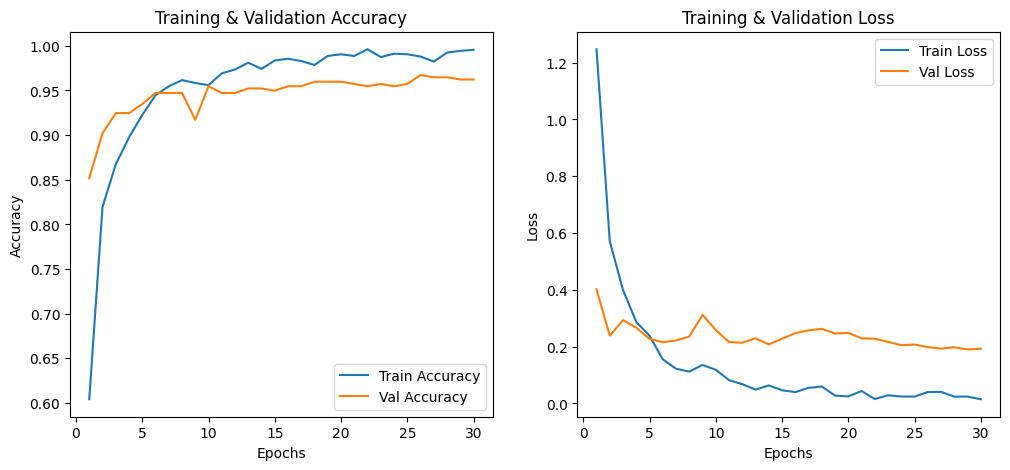

In [54]:
plot_learning_curves(history, start_epoch=1)

In [55]:
y_true, y_pred_classes = evaluate_model_performance(transfer_resnet50_model, val_generator, class_labels)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - accuracy: 0.9526 - loss: 0.2823
Validation Accuracy: 96.23%
Validation Loss: 0.1902
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 415ms/step

Classification Report:
              precision    recall  f1-score   support

       glass       0.95      0.95      0.95        80
     organic       0.96      0.97      0.97        74
       paper       0.99      0.96      0.97        81
     plastic       0.94      0.94      0.94        82
     textile       0.98      0.99      0.98        81

    accuracy                           0.96       398
   macro avg       0.96      0.96      0.96       398
weighted avg       0.96      0.96      0.96       398



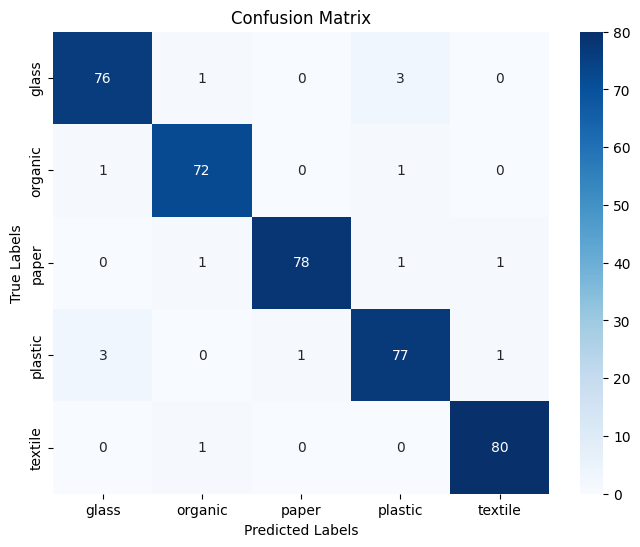

In [56]:
plot_confusion_matrix(y_true, y_pred_classes, class_labels)

### MobileNetV3

In [59]:
# Import required libraries
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define input shape and number of classes
IMAGE_SIZE = (224, 224)  # Based on dataset
NUM_CLASSES = len(train_generator.class_indices)  # Auto-detect number of classes

# Load MobileNetV3 Large with ImageNet weights
base_model = MobileNetV3Large(input_shape=(224, 224, 3), include_top=False, weights="imagenet")

# **Step 1: Freeze base model initially**
base_model.trainable = False  # Freeze convolutional base

# Add custom classification head
x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.3)(x)  # Dropout for regularization
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)  # Improve stability
x = Dropout(0.3)(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)  # Output layer

# Define the model
mobilenetv3_model = Model(inputs=base_model.input, outputs=output)

# Compile the model (initial phase)
mobilenetv3_model.compile(optimizer=Adam(learning_rate=0.0001),
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

mobilenetv3_model.summary()

12683000/12683000 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv (Conv2D)             │ (None, 112, 112, 16)   │            432 │ rescaling[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_bn                   │ (None, 112, 112, 16)   │             64 │ conv[0][0]             │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 112, 112, 16)   │              0 │ conv_bn[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 16)   │            144 │ activation[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 16)   │             64 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu (ReLU)              │ (None, 112, 112, 16)   │              0 │ expanded_conv_depthwi… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            256 │ re_lu[0][0]            │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_bn  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_add (Add)   │ (None, 112, 112, 16)   │              0 │ activation[0][0],      │
│                           │                        │                │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_1_expand    │ (None, 112, 112, 64)   │          1,024 │ expanded_conv_add[0][… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_1_expand_bn │ (None, 112, 112, 64)   │            256 │ expanded_conv_1_expan… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_1 (ReLU)            │ (None, 112, 112, 64)   │              0 │ expanded_conv_1_expan… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_1_depthwis… │ (None, 113, 113, 64)   │              0 │ re_lu_1[0][0]          │
│ (ZeroPadding2D)      

 Total params: 3,120,517 (11.90 MB)

 Trainable params: 123,909 (484.02 KB)

 Non-trainable params: 2,996,608 (11.43 MB)

In [60]:
# Import the preprocessing function specific to mobilenet_v3
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input

# Create training and validation data generators with ResNet50 preprocessing
train_generator, val_generator = create_data_generators(
    train_df,          # DataFrame containing training file paths and labels
    val_df,            # DataFrame containing validation file paths and labels
    img_size=(224, 224),  # Target image size for resizing
    batch_size=32,        # Number of images per batch
    preprocessing_function=preprocess_input  # Apply mobilenet_v3 preprocessing
)

Found 1589 validated image filenames belonging to 5 classes.
Found 398 validated image filenames belonging to 5 classes.


In [61]:
# **Step 2: Train the top layers first**
history = mobilenetv3_model.fit(train_generator,
                                validation_data=val_generator,
                                epochs=20,  # Train for a few epochs first
                                class_weight=class_weights,  # Use if dataset is imbalanced
                                callbacks=[reduce_lr, early_stopping])

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 59s 892ms/step - accuracy: 0.2546 - loss: 2.2583 - val_accuracy: 0.5754 - val_loss: 1.0375 - learning_rate: 1.0000e-04
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 28s 563ms/step - accuracy: 0.5081 - loss: 1.2790 - val_accuracy: 0.7487 - val_loss: 0.6562 - learning_rate: 1.0000e-04
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 27s 545ms/step - accuracy: 0.6314 - loss: 1.0250 - val_accuracy: 0.8417 - val_loss: 0.5005 - learning_rate: 1.0000e-04
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 540ms/step - accuracy: 0.6869 - loss: 0.8933 - val_accuracy: 0.8543 - val_loss: 0.4275 - learning_rate: 1.0000e-04
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 27s 537ms/step - accuracy: 0.7569 - loss: 0.7290 - val_accuracy: 0.8769 - val_loss: 0.3801 - learning_rate: 1.0000e-04
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 27s 541ms/step - accuracy: 0.7835 - loss: 0.6118 - val_accuracy: 0.8794 - val_loss: 0.3468 - learning_rate: 1.0000e-04
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 27s 542ms/step - acc

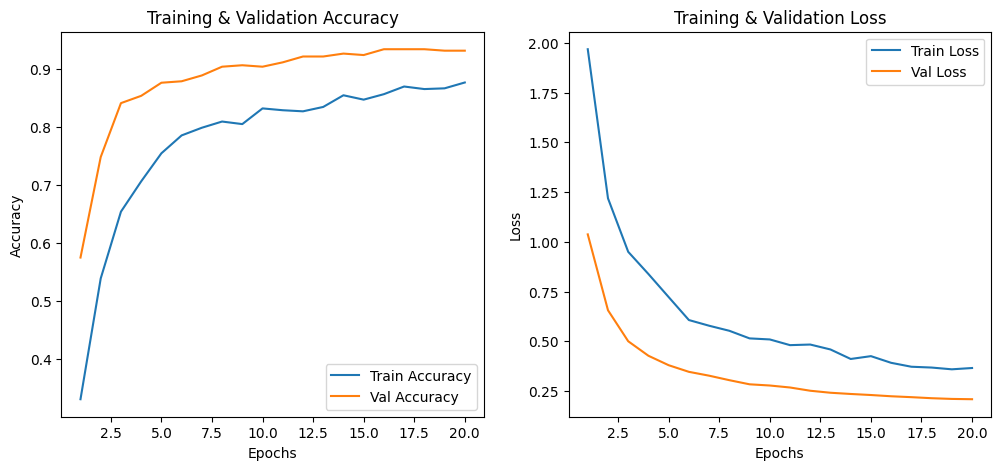

In [67]:
plot_learning_curves(history, start_epoch=1)

In [62]:
# **Step 3: Fine-tune the entire model**
base_model.trainable = True  # Unfreeze all layers
mobilenetv3_model.compile(optimizer=Adam(learning_rate=0.00001),  # Lower learning rate
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

# Train again with fine-tuning
history_finetune = mobilenetv3_model.fit(train_generator,
                                         validation_data=val_generator,
                                         epochs=20,  # Additional training
                                         class_weight=class_weights,
                                         callbacks=[reduce_lr, early_stopping])

# Save the trained model
mobilenetv3_model.save('mobilenetv3_model.keras')

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.7715 - loss: 0.6914 - val_accuracy: 0.9196 - val_loss: 0.2047 - learning_rate: 1.0000e-05
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 28s 558ms/step - accuracy: 0.7887 - loss: 0.6042 - val_accuracy: 0.9196 - val_loss: 0.2079 - learning_rate: 1.0000e-05
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 28s 562ms/step - accuracy: 0.7835 - loss: 0.5796 - val_accuracy: 0.9221 - val_loss: 0.2121 - learning_rate: 1.0000e-05
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 28s 565ms/step - accuracy: 0.7961 - loss: 0.5943 - val_accuracy: 0.9246 - val_loss: 0.2144 - learning_rate: 1.0000e-05
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 28s 563ms/step - accuracy: 0.8105 - loss: 0.5270 - val_accuracy: 0.9196 - val_loss: 0.2135 - learning_rate: 1.0000e-05
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 28s 562ms/step - accuracy: 0.7975 - loss: 0.5517 - val_accuracy: 0.9221 - val_loss: 0.2119 - learning_rate: 1.0000e-05
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 581ms/step - accur

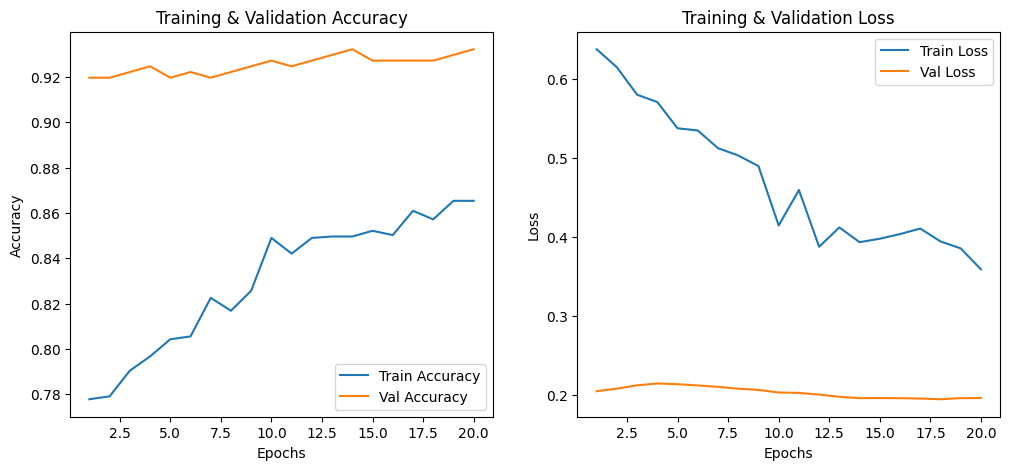

In [66]:
plot_learning_curves(history_finetune, start_epoch=1)

In [68]:
y_true, y_pred_classes = evaluate_model_performance(mobilenetv3_model, val_generator, class_labels)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.9387 - loss: 0.1661
Validation Accuracy: 92.71%
Validation Loss: 0.1945
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 522ms/step

Classification Report:
              precision    recall  f1-score   support

       glass       0.91      0.94      0.93        80
     organic       0.96      0.89      0.92        74
       paper       0.96      0.94      0.95        81
     plastic       0.89      0.89      0.89        82
     textile       0.92      0.98      0.95        81

    accuracy                           0.93       398
   macro avg       0.93      0.93      0.93       398
weighted avg       0.93      0.93      0.93       398



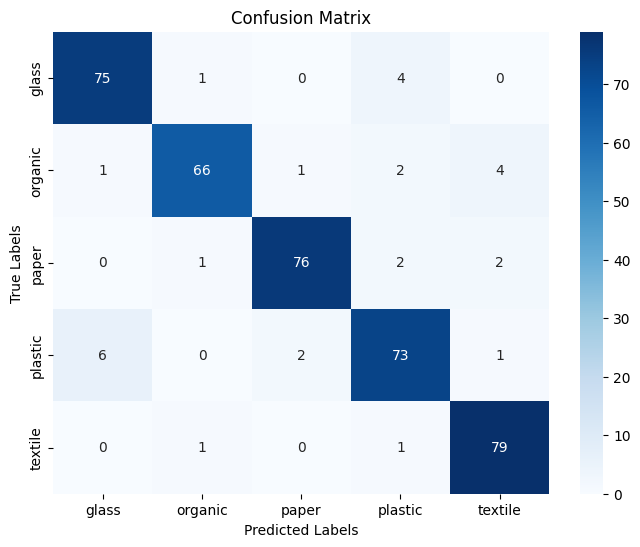

In [69]:
plot_confusion_matrix(y_true, y_pred_classes, class_labels)

### EfficientNetB3

In [70]:
# Import required libraries
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define input shape and number of classes
IMAGE_SIZE = (224, 224)  # Adjust as needed
NUM_CLASSES = len(train_generator.class_indices)  # Auto-detect number of classes

# Load EfficientNetB3 with pre-trained ImageNet weights
base_model = EfficientNetB3(input_shape=(224, 224, 3), include_top=False, weights="imagenet")

# **Step 1: Freeze base model initially**
base_model.trainable = False  # Freeze convolutional base

# Add custom classification head
x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.3)(x)  # Dropout for regularization
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)  # Improve stability
x = Dropout(0.3)(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)  # Output layer

# Define the model
efficientnet_model = Model(inputs=base_model.input, outputs=output)

# Compile the model (initial phase)
efficientnet_model.compile(optimizer=Adam(learning_rate=0.0001),
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

efficientnet_model.summary()

43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 224, 224, 3)    │              7 │ rescaling_1[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_2 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ rescaling_2[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 40)   │          1,080 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 40)   │            160 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 40)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 40)   │            360 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 40)   │            160 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 40)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 40)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 40)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 10)       │            410 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 10,981,428 (41.89 MB)

 Trainable params: 197,637 (772.02 KB)

 Non-trainable params: 10,783,791 (41.14 MB)

In [71]:
# Import the preprocessing function specific to efficientnet
from tensorflow.keras.applications.efficientnet import preprocess_input

# Create training and validation data generators with ResNet50 preprocessing
train_generator, val_generator = create_data_generators(
    train_df,          # DataFrame containing training file paths and labels
    val_df,            # DataFrame containing validation file paths and labels
    img_size=(224, 224),  # Target image size for resizing
    batch_size=32,        # Number of images per batch
    preprocessing_function=preprocess_input  # Apply efficientnet preprocessing
)

Found 1589 validated image filenames belonging to 5 classes.
Found 398 validated image filenames belonging to 5 classes.


In [72]:
# **Step 2: Train only the top layers first**
history = efficientnet_model.fit(train_generator,
                                 validation_data=val_generator,
                                 epochs=20,  # Train for a few epochs first
                                 class_weight=class_weights,  # Handle imbalance
                                 callbacks=[reduce_lr, early_stopping])

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.2713 - loss: 2.2536 - val_accuracy: 0.6181 - val_loss: 1.1618 - learning_rate: 1.0000e-04
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 28s 566ms/step - accuracy: 0.5742 - loss: 1.1539 - val_accuracy: 0.7990 - val_loss: 0.8056 - learning_rate: 1.0000e-04
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 573ms/step - accuracy: 0.6739 - loss: 0.8972 - val_accuracy: 0.8492 - val_loss: 0.5908 - learning_rate: 1.0000e-04
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 577ms/step - accuracy: 0.7472 - loss: 0.6881 - val_accuracy: 0.8744 - val_loss: 0.4686 - learning_rate: 1.0000e-04
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 567ms/step - accuracy: 0.8032 - loss: 0.5810 - val_accuracy: 0.8769 - val_loss: 0.3947 - learning_rate: 1.0000e-04
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 31s 630ms/step - accuracy: 0.8092 - loss: 0.5424 - val_accuracy: 0.8894 - val_loss: 0.3481 - learning_rate: 1.0000e-04
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 28s 569ms/step - accur

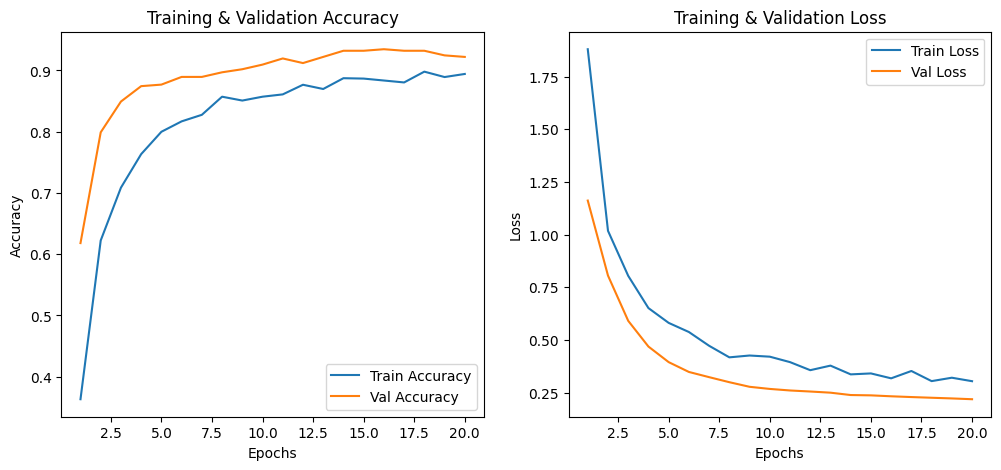

In [73]:
plot_learning_curves(history, start_epoch=1)

In [74]:
# **Step 3: Fine-tune the entire model**
base_model.trainable = True  # Unfreeze all layers
efficientnet_model.compile(optimizer=Adam(learning_rate=0.00001),  # Lower learning rate
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

# Train again with fine-tuning
history_finetune = efficientnet_model.fit(train_generator,
                                          validation_data=val_generator,
                                          epochs=20,  # Additional training
                                          class_weight=class_weights,
                                          callbacks=[reduce_lr, early_stopping])

# Save the trained model
efficientnet_model.save('efficientnetb3_model.keras')

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 247s 2s/step - accuracy: 0.6731 - loss: 0.8947 - val_accuracy: 0.9146 - val_loss: 0.2726 - learning_rate: 1.0000e-05
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 32s 635ms/step - accuracy: 0.7256 - loss: 0.8014 - val_accuracy: 0.8819 - val_loss: 0.3227 - learning_rate: 1.0000e-05
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 32s 645ms/step - accuracy: 0.7221 - loss: 0.7884 - val_accuracy: 0.8719 - val_loss: 0.3570 - learning_rate: 1.0000e-05
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 31s 610ms/step - accuracy: 0.7278 - loss: 0.7717 - val_accuracy: 0.8693 - val_loss: 0.3690 - learning_rate: 1.0000e-05
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 31s 628ms/step - accuracy: 0.7470 - loss: 0.6518 - val_accuracy: 0.8643 - val_loss: 0.3797 - learning_rate: 1.0000e-05
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 32s 626ms/step - accuracy: 0.7783 - loss: 0.6334 - val_accuracy: 0.8618 - val_loss: 0.3821 - learning_rate: 1.0000e-05
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 31s 615ms/step - accur

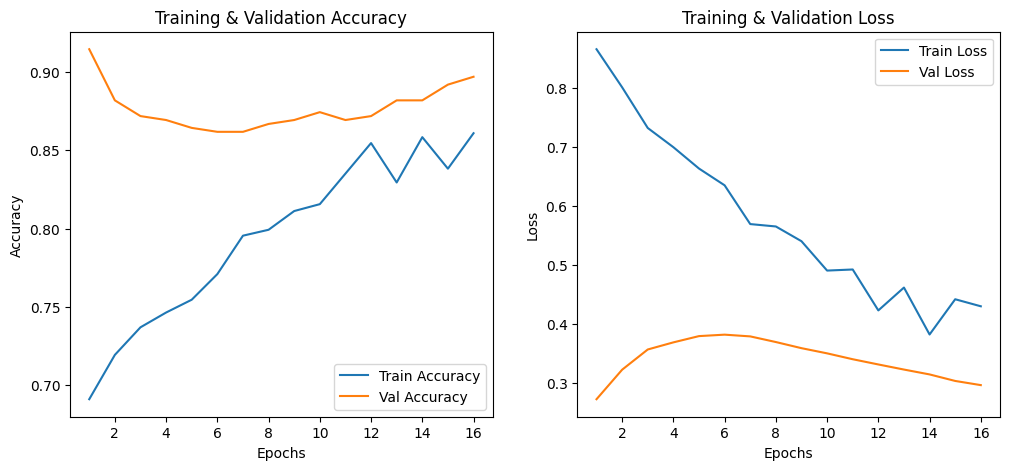

In [75]:
plot_learning_curves(history_finetune, start_epoch=1)

In [76]:
y_true, y_pred_classes = evaluate_model_performance(efficientnet_model, val_generator, class_labels)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.9083 - loss: 0.2743
Validation Accuracy: 91.46%
Validation Loss: 0.2726
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 958ms/step

Classification Report:
              precision    recall  f1-score   support

       glass       0.88      0.86      0.87        80
     organic       0.95      0.95      0.95        74
       paper       0.93      0.95      0.94        81
     plastic       0.88      0.85      0.86        82
     textile       0.94      0.96      0.95        81

    accuracy                           0.91       398
   macro avg       0.91      0.92      0.91       398
weighted avg       0.91      0.91      0.91       398



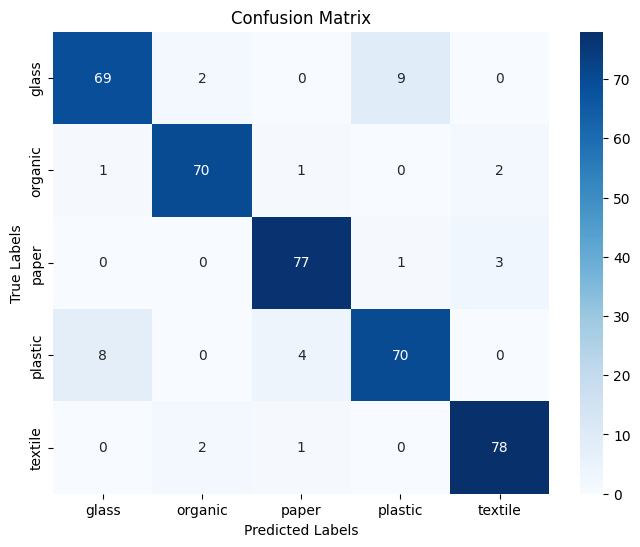

In [77]:
plot_confusion_matrix(y_true, y_pred_classes, class_labels)

### CNN

In [78]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Define the model architecture
custom_cnn = Sequential([
    # First Convolution Block
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu', padding='same'),  # Extra layer
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # Second Convolution Block
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),  # Extra layer
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # Third Convolution Block
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu', padding='same'),  # Extra layer
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # Fourth Convolution Block
    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3,3), activation='relu', padding='same'),  # Extra layer
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # Flatten to Fully Connected Layers
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Increased dropout to prevent overfitting

    # Output layer (Auto-detect number of classes)
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
custom_cnn.compile(optimizer=Adam(learning_rate=0.0001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Model Summary
custom_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 256)         │         590,0

 Total params: 27,034,661 (103.13 MB)

 Trainable params: 27,031,205 (103.12 MB)

 Non-trainable params: 3,456 (13.50 KB)

In [79]:
# Create training and validation data generators with ResNet50 preprocessing
train_generator, val_generator = create_data_generators(
    train_df,          # DataFrame containing training file paths and labels
    val_df,            # DataFrame containing validation file paths and labels
    img_size=(224, 224),  # Target image size for resizing
    batch_size=32,        # Number of images per batch
    preprocessing_function=None  # NO preprocessing
)

Found 1589 validated image filenames belonging to 5 classes.
Found 398 validated image filenames belonging to 5 classes.


In [80]:
# Define callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# Train the Model
num_epochs = 50

history = custom_cnn.fit(
    train_generator,
    validation_data=val_generator,
    epochs=num_epochs,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator),
    callbacks=[reduce_lr, early_stopping]
)

# Save the model
custom_cnn.save("custom_cnn.keras")

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.2993 - loss: 2.1874 - val_accuracy: 0.2060 - val_loss: 1.9910 - learning_rate: 1.0000e-04
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 580ms/step - accuracy: 0.4389 - loss: 1.6989 - val_accuracy: 0.2060 - val_loss: 2.6542 - learning_rate: 1.0000e-04
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 577ms/step - accuracy: 0.4638 - loss: 1.7040 - val_accuracy: 0.2010 - val_loss: 2.7998 - learning_rate: 1.0000e-04
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 580ms/step - accuracy: 0.5406 - loss: 1.4201 - val_accuracy: 0.2060 - val_loss: 3.6848 - learning_rate: 1.0000e-04
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 586ms/step - accuracy: 0.5203 - loss: 1.3871 - val_accuracy: 0.2060 - val_loss: 2.9318 - learning_rate: 1.0000e-04
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 550ms/step - accuracy: 0.5655 - loss: 1.3614
Epoch 6: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 580ms/step - accuracy: 0.

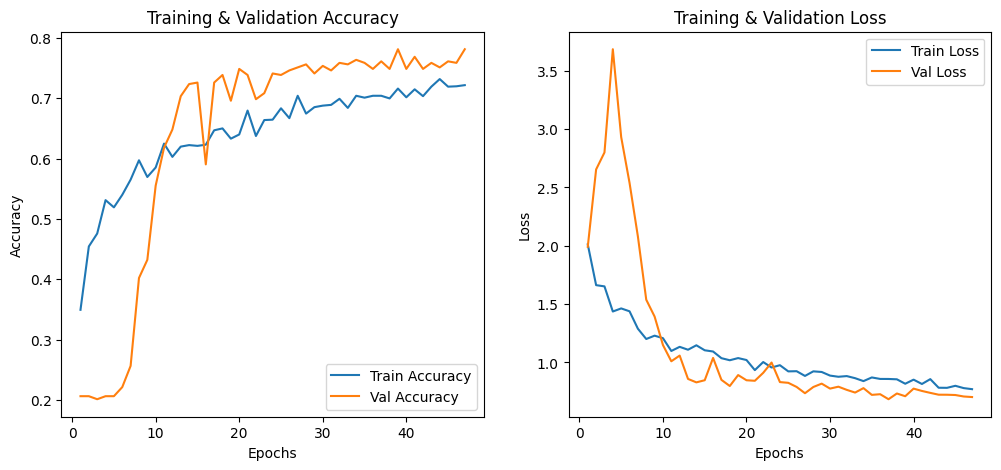

In [82]:
plot_learning_curves(history, start_epoch=1)

In [83]:
y_true, y_pred_classes = evaluate_model_performance(custom_cnn, val_generator, class_labels)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.7734 - loss: 0.6768
Validation Accuracy: 76.13%
Validation Loss: 0.6843
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step

Classification Report:
              precision    recall  f1-score   support

       glass       0.77      0.70      0.73        80
     organic       0.82      0.85      0.83        74
       paper       0.68      0.77      0.72        81
     plastic       0.74      0.67      0.71        82
     textile       0.81      0.83      0.82        81

    accuracy                           0.76       398
   macro avg       0.76      0.76      0.76       398
weighted avg       0.76      0.76      0.76       398



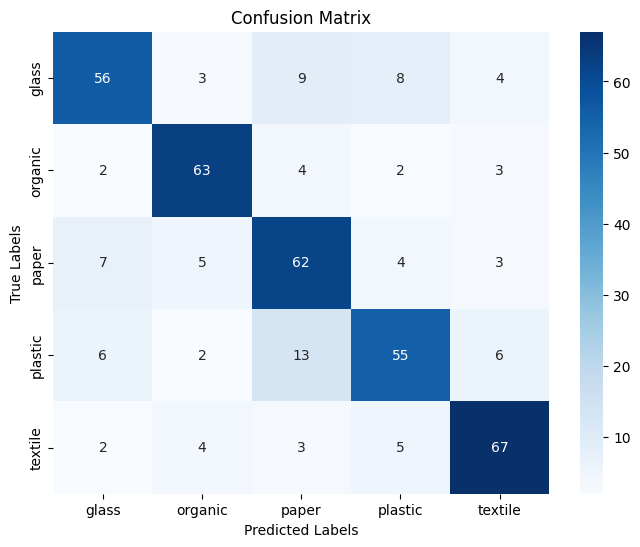

In [84]:
plot_confusion_matrix(y_true, y_pred_classes, class_labels)